In [25]:
import tensorflow as tf
from tensorflow import keras

# Building an image classifier using Sequential API

In [26]:
fashion= keras.datasets.fashion_mnist
(xtrain_full , ytrain_full), (xtest ,ytest)= fashion.load_data()

Using Keras rather than Scikit-Learn, one
important difference is that every image is represented as a 28×28 array rather than a
1D array of size 784

In [27]:
xtrain_full.shape , ytrain_full.shape

((60000, 28, 28), (60000,))

In [28]:
xtrain_full.dtype


dtype('uint8')


For simplicity, we just
scale the pixel intensities down to the 0-1 range by dividing them by 255.0 (this also
converts them to floats):

Splitting the data into training and validation set

In [29]:
x_valid , x_train= xtrain_full[:5000] / 255.0 , xtrain_full[5000:] / 255.0


In [30]:
y_valid , y_train = ytrain_full[:5000] , ytrain_full[5000:]

In [31]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
 "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

In [32]:
class_names[y_train[0]]

'Coat'

In [33]:
class_names[y_train[1]]

'T-shirt/top'

A Flatten layer whose
role is simply to convert each input image into a 1D array: if it receives input data
X, it computes X.reshape(-1, 1). This layer does not have any parameters, it is
just there to do some simple preprocessing. Since it is the first layer in the model,
you should specify the input_shape: this does not include the batch size, only the
shape of the instances. Alternatively, you could add a keras.layers.InputLayer
as the first layer, setting shape=[28,28].

Next we add a Dense hidden layer with 300 neurons. It will use the ReLU activa‐
tion function. Each Dense layer manages its own weight matrix, containing all the
connection weights between the neurons and their inputs. 

In [34]:
model= keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28,28]))
model.add(keras.layers.Dense(300, activation='relu'))
model.add(keras.layers.Dense(100, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))

e:\Senanalysis\drf-app\senalysis.venv\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [35]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_1 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 300)            │       235,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 100)            │        30,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 266,610 (1.02 MB)

 Trainable params: 266,610 (1.02 MB)

 Non-trainable params: 0 (0.00 B)

Note that Dense layers often have a lot of parameters. For example, the first hidden
layer has 784 × 300 connection weights, plus 300 bias terms, which adds up to
235,500 parameters! This gives the model quite a lot of flexibility to fit the training
data, but it also means that the model runs the risk of overfitting, especially when you
do not have a lot of training data

In [36]:
model.layers

[<Flatten name=flatten_1, built=True>,
 <Dense name=dense_3, built=True>,
 <Dense name=dense_4, built=True>,
 <Dense name=dense_5, built=True>]

In [42]:
model.layers[0].name

'flatten_1'

In [50]:
model.get_layer('dense_3')

<Dense name=dense_3, built=True>

In [ ]:
# !pip install pydot
# !pip install graphviz

  Using cached graphviz-0.21-py3-none-any.whl.metadata (12 kB)
Using cached graphviz-0.21-py3-none-any.whl (47 kB)



[notice] A new release of pip is available: 24.0 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [62]:
keras.utils.plot_model(model)

You must install graphviz (see instructions at https://graphviz.gitlab.io/download/) for `plot_model` to work.


In [44]:
model.get_layer('flatten_1').get_weights

<bound method Layer.get_weights of <Flatten name=flatten_1, built=True>>

In [46]:
weight , biases =model.get_layer('dense_3').get_weights()


In [48]:
weight

array([[ 0.04015452, -0.02600199,  0.02194831, ..., -0.03358709,
        -0.05660124, -0.00773285],
       [-0.01111239,  0.02790548, -0.04779112, ..., -0.04266855,
        -0.00402869, -0.05370682],
       [ 0.06988396, -0.04666817, -0.0489075 , ..., -0.05732943,
        -0.01838793,  0.07401259],
       ...,
       [-0.00525659,  0.04664525, -0.05206206, ...,  0.03138556,
         0.0556058 , -0.0565803 ],
       [ 0.07025827,  0.0723245 , -0.00763494, ..., -0.00585449,
         0.02471389, -0.01196741],
       [-0.03627051,  0.00085568,  0.0478256 , ...,  0.00509818,
         0.06010516, -0.06062972]], shape=(784, 300), dtype=float32)

In [49]:
biases

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [47]:
weight.shape

(784, 300)

In [51]:
biases.shape

(300,)

we use the "sparse_categorical_crossen
tropy" loss because we have sparse labels (i.e., for each instance there is just a target
class index, from 0 to 9 in this case), and the classes are exclusive. If instead we had
one target probability per class for each instance (such as one-hot vectors, e.g. [0.,
0., 0., 1., 0., 0., 0., 0., 0., 0.] to represent class 3), then we would need
to use the "categorical_crossentropy" loss instead. If we were doing binary classi‐
fication (with one or more binary labels), then we would use the "sigmoid" (i.e.,
logistic) activation function in the output layer instead of the "softmax" activation
function, and we would use the "binary_crossentropy" loss.

"sgd" simply means that we will train the model
using simple Stochastic Gradient Descent. In other words, Keras will perform the
backpropagation algorithm described earlier (i.e., reverse-mode autodiff + Gradient
Descent). 

In [52]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='sgd' , metrics=['accuracy'])

The fit() method returns a History object containing the training parameters (his
tory.params), the list of epochs it went through (history.epoch), and most impor‐
tantly a dictionary (history.history) containing the loss and extra metrics it
measured at the end of each epoch on the training set and on the validation set 

In [55]:
history= model.fit(x_train , y_train , epochs=30 , validation_data=(x_valid , y_valid))

Epoch 1/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7586 - loss: 0.7308 - val_accuracy: 0.8320 - val_loss: 0.5059
Epoch 2/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8295 - loss: 0.4927 - val_accuracy: 0.8394 - val_loss: 0.4531
Epoch 3/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8444 - loss: 0.4464 - val_accuracy: 0.8500 - val_loss: 0.4369
Epoch 4/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8530 - loss: 0.4199 - val_accuracy: 0.8540 - val_loss: 0.4176
Epoch 5/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8597 - loss: 0.3997 - val_accuracy: 0.8628 - val_loss: 0.3971
Epoch 6/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8647 - loss: 0.3828 - val_accuracy: 0.8624 - val_loss: 0.3862
Epoch 7/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8697 - loss: 0.3681 - val_accuracy: 0.8698 - val_loss: 0.3719
Epoch 8/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8736 - loss: 0.3572 - 

In [60]:
import pandas as pd
import matplotlib.pyplot as plt

In [59]:
data=pd.DataFrame(history.history)

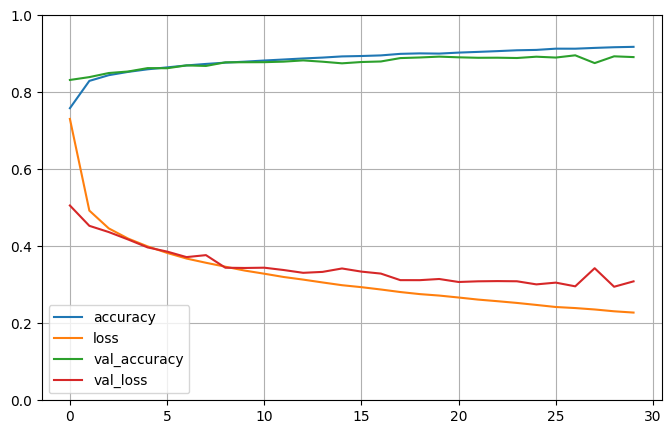

In [61]:
data.plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

# Model evaluation

In [63]:
model.evaluate(xtest , ytest)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8348 - loss: 76.6711


[76.67108154296875, 0.8348000049591064]

In [66]:
xnew=xtest[:30]
y_prob=model.predict(xnew)
y_prob.round(2)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 

In [73]:
ypred= model.predict(xnew)
ypred= ypred.argmax(axis=1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


In [74]:
ypred


array([9, 2, 1, 1, 0, 1, 4, 4, 5, 7, 4, 5, 5, 3, 4, 1, 2, 2, 8, 0, 2, 5,
       7, 9, 1, 4, 4, 0, 9, 4])

In [75]:
import numpy as np

In [78]:
for i in range(len(ypred)):
    print(i+1 ,np.array(class_names)[ypred[i]])

1 Ankle boot
2 Pullover
3 Trouser
4 Trouser
5 T-shirt/top
6 Trouser
7 Coat
8 Coat
9 Sandal
10 Sneaker
11 Coat
12 Sandal
13 Sandal
14 Dress
15 Coat
16 Trouser
17 Pullover
18 Pullover
19 Bag
20 T-shirt/top
21 Pullover
22 Sandal
23 Sneaker
24 Ankle boot
25 Trouser
26 Coat
27 Coat
28 T-shirt/top
29 Ankle boot
30 Coat


In [79]:
ynew=ytest[:3]
ynew

array([9, 2, 1], dtype=uint8)